# NBA-Players dataset을 이용한 NBA 신인선수 성공여부 분류

2021-2학기 20170303 우민식


### 데이터 적재 
### NBA-Players dataset

>  1980년도부터 2016년까지의 NBA 신인선수들이 첫 시즌에 기록한 경기기록들로 구성된 데이터 셋이다. 본 프로젝트에서 성공의 기준을 NBA 선수들 평균 커리어 길이인 5년을 넘겼는 가에 대해 진행하였다.
https://www.kaggle.com/sveneschlbeck/nba-players-career-duration/code
  
  
* 예측 변수
 - target_5yrs : 성공=1, 실패=0

* 설명 변수 
 - PlayerID	: 선수 고유번호
 - Name	: 선수 성명
 - gp : 한 시즌동안 뛴 경기
 - min : 각 경기마다 뛴 경기 시간
 - pts : 한경기 평균 득점
 - fgm : 한경기 슛 성공개수
 - fga : 한경기 슛 시도개수
 - fg : 한경기 슛 성공률
 - 3p_made : 한경기 3점슛 성공개수
 - 3pa : 한경기 3점슛 시도개수
 - 3p : 한경기 3점슛 성공률
 - ftm : 한경기 자유투 성공개수
 - fta : 한경기 자유투 시도
 - ft : 한경기 자유투 성공률
 - oreb : 한경기 공격 리바운드 개수
 - dreb : 한경기 수비 리바운드 개수
 - reb : 한경기 리바운드 개수
 - ast : 한경기 도움 개수
 - stl : 한경기 스틸 개수
 - blk : 한경기 블록 개수
 - tov : 한경기 턴오버 개수



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

# 구글 드라이브에서 파일 읽어오기
df = pd.read_csv('/content/gdrive/My Drive/nba-players-2.csv')
df.rename( columns={'Unnamed: 0':'PlayerID'}, inplace=True )

#확인을 위해 데이터 상위 5개 출력
df.head()

,PlayerID,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1
1,1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,5,Tony Bennett,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
4,8,Duane Cooper,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0


> ### 데이터 탐색(EDA) 및 전처리

> 분석에 앞서 적재된 데이터를 확인하여 이해하고 필요한 처리를 수행

> #### 데이터 내용 확인

In [3]:
#중복값 제거
df=df.drop_duplicates(['name','pts'])

#데이터셋의 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PlayerID     1308 non-null   int64  
 1   name         1308 non-null   object 
 2   gp           1308 non-null   int64  
 3   min          1308 non-null   float64
 4   pts          1308 non-null   float64
 5   fgm          1308 non-null   float64
 6   fga          1308 non-null   float64
 7   fg           1308 non-null   float64
 8   3p_made      1308 non-null   float64
 9   3pa          1308 non-null   float64
 10  3p           1308 non-null   float64
 11  ftm          1308 non-null   float64
 12  fta          1308 non-null   float64
 13  ft           1308 non-null   float64
 14  oreb         1308 non-null   float64
 15  dreb         1308 non-null   float64
 16  reb          1308 non-null   float64
 17  ast          1308 non-null   float64
 18  stl          1308 non-null   float64
 19  blk   

In [4]:
# 숫자형 변수에 대한 5-Number summary 요약 수치(통계량)
df.describe()

,PlayerID,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
count,1308.000000,1308.000000,1308.000000,1308.000000,1308.00000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000,1308.000000
mean,675.417431,60.344801,17.605352,6.785321,2.62263,5.871865,44.173242,0.249083,0.781422,19.237232,1.292890,1.815291,70.330505,1.008639,2.023930,3.031575,1.543807,0.616820,0.369495,1.189144,0.647554
std,385.658276,17.406994,8.286363,4.331749,1.67271,3.572138,6.120518,0.385813,1.066431,16.115992,0.980687,1.315755,10.545422,0.774652,1.356342,2.050380,1.468204,0.409704,0.431109,0.719977,0.477915
min,0.000000,11.000000,3.100000,0.700000,0.30000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,343.750000,47.000000,10.900000,3.700000,1.40000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,677.500000,63.000000,16.100000,5.550000,2.10000,4.800000,44.050000,0.100000,0.300000,22.200000,1.000000,1.500000,71.200000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,1009.250000,77.000000,22.825000,8.800000,3.40000,7.500000,47.825000,0.400000,1.200000,32.700000,1.600000,2.300000,77.500000,1.400000,2.600000,3.900000,2.000000,0.800000,0.500000,1.500000,1.000000
max,1339.000000,82.000000,40.900000,28.200000,10.20000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


> #### 예측 변수 확인
target_5yrs 변수가 어떤 분포를 가지고 있는 지 확인


In [5]:
# NBA 신인선수 성공여부별 데이터 건수 카운트
df['target_5yrs'].value_counts()

1    847
0    461
Name: target_5yrs, dtype: int64

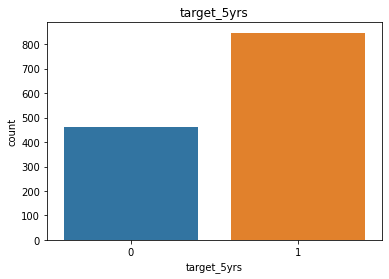

In [6]:
# 성공여부 차트 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="target_5yrs", data=df)
plt.title("target_5yrs")
plt.show()

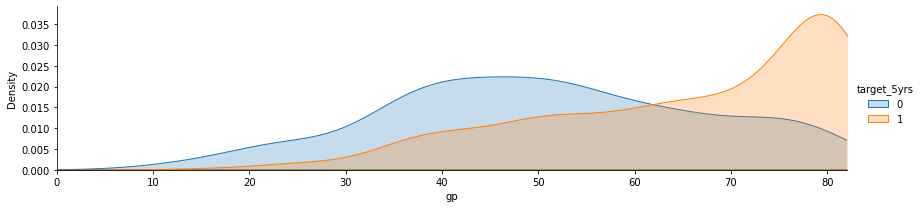

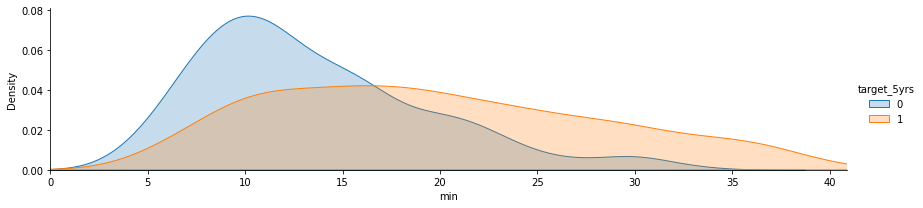

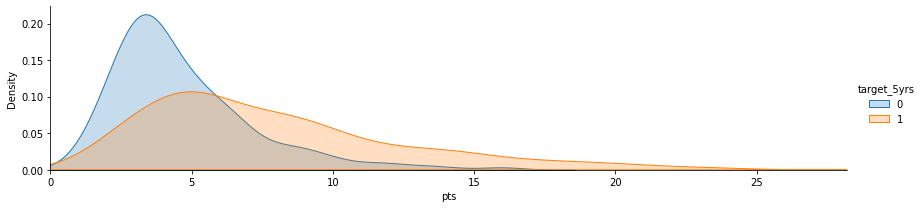

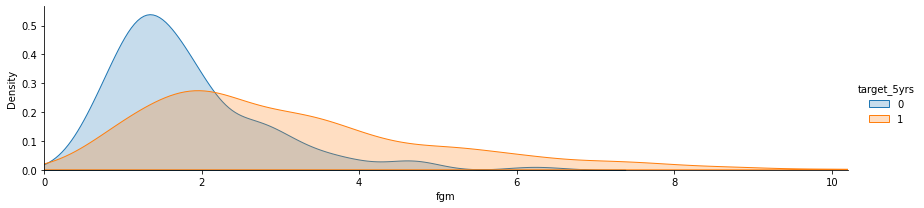

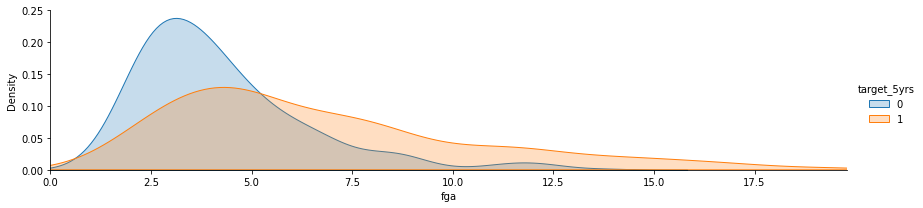

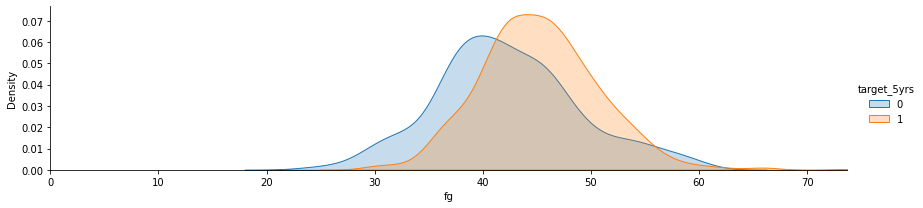

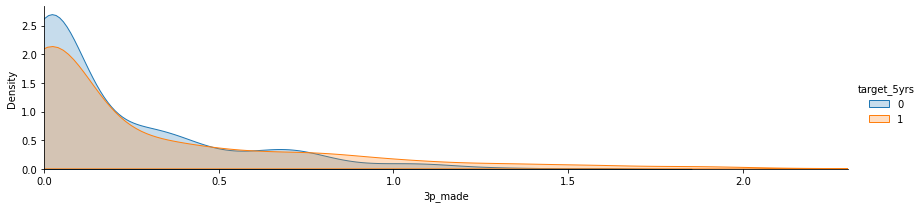

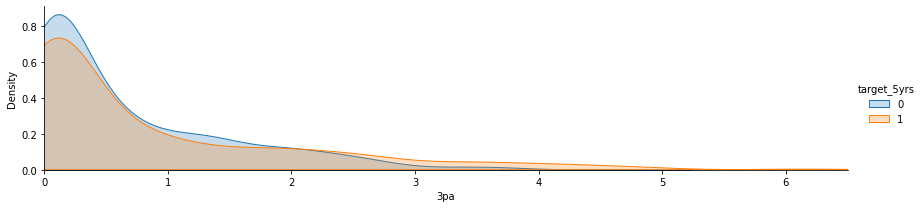

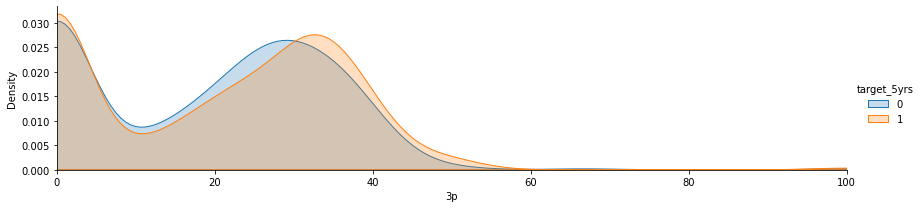

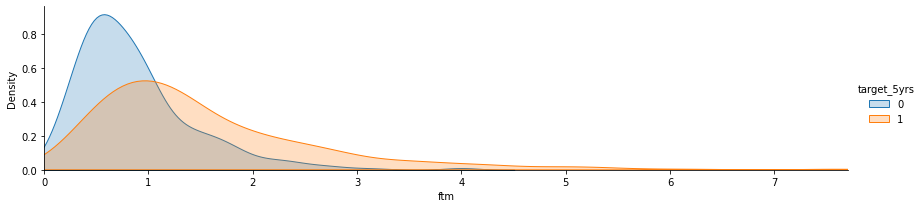

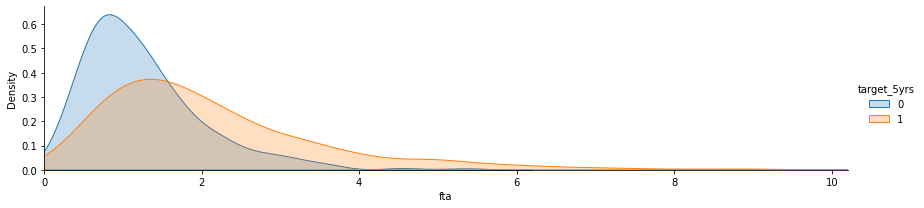

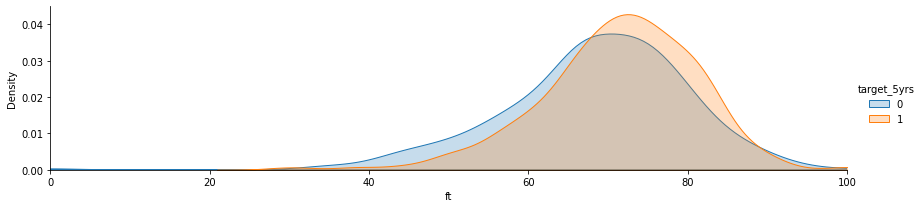

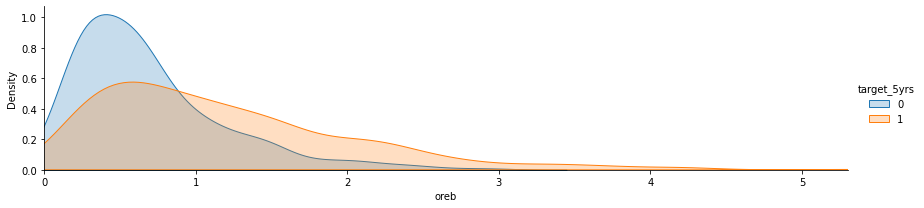

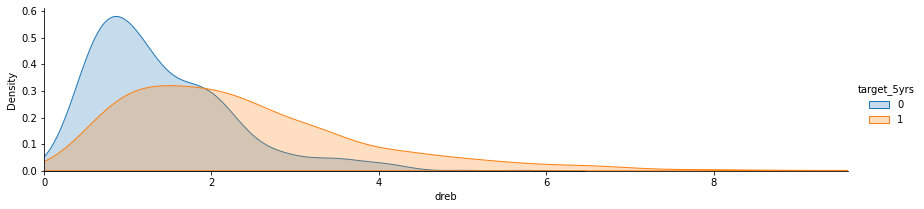

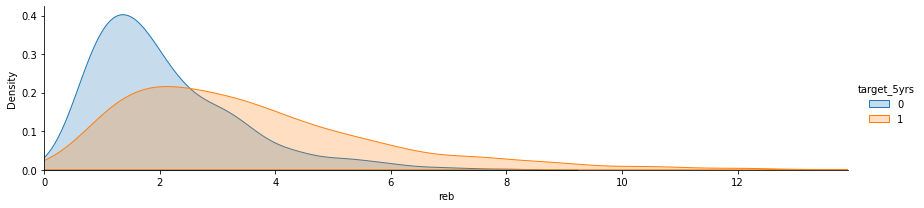

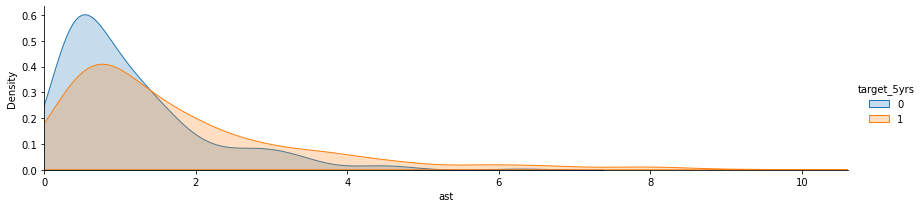

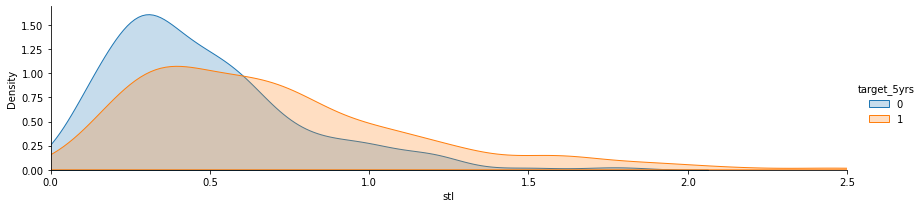

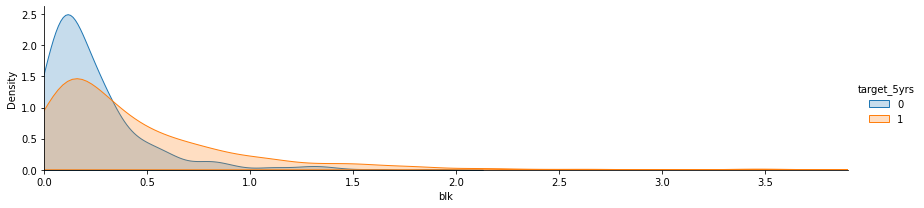

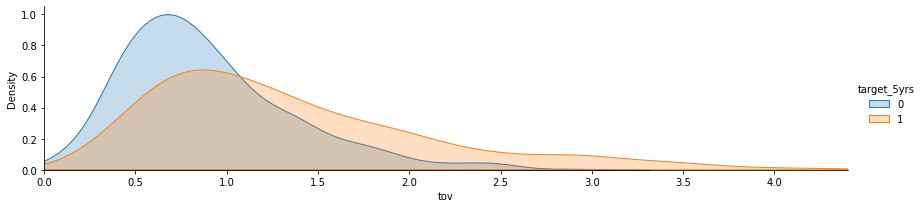

In [7]:
# 각 변수에 따른 성공여부 분포 

# 설명 변수 중 PlayerID, 이름을 제외한 변수들의 리스트 생성
header_list = list(df.columns.values)
header_list=header_list[2:len(header_list)-1]

# 각 변수에 따른 성공여부 분포도 
for a in header_list : 
  facet = sns.FacetGrid(df, hue="target_5yrs", aspect=4)
  facet.map(sns.kdeplot, a, shade=True)
  facet.set(xlim=(0, df[a].max()))
  facet.add_legend()
  sns.axes_style("darkgrid")


plt.show()

> #### 데이터 전처리

In [8]:
# 분석에 사용할 수 없는 데이터 삭제(String 및 Id값)
del df['PlayerID']
del df['name']


In [9]:
df.head()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,fta,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,1
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,75,11.4,3.7,1.5,3.5,42.3,0.3,1.1,32.5,0.4,0.5,73.2,0.2,0.7,0.8,1.8,0.4,0.0,0.7,0
4,65,9.9,2.4,1.0,2.4,39.2,0.1,0.5,23.3,0.4,0.5,71.4,0.2,0.6,0.8,2.3,0.3,0.0,1.1,0


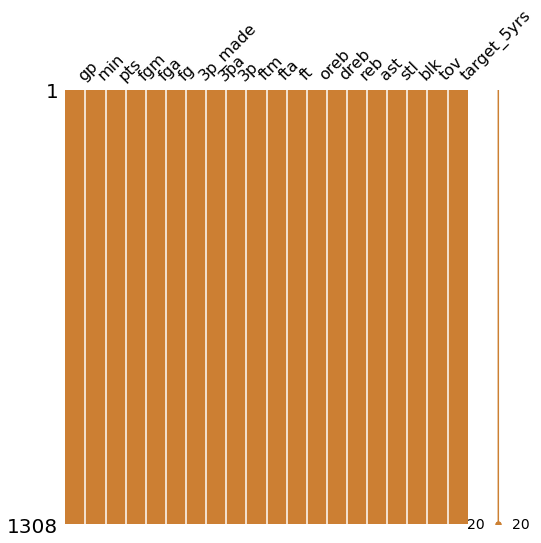

In [10]:
# null data의 존재 시각화
import missingno as msno
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# null data가 없음을 확인할 수 있다.

> ### 학습 데이터와 시험 데이터 준비

> train_test_split : 데이터를 학습용 데이터와 시험용 데이터로 분리  
train_test_split(data, data2, test_size, train_size, random_state)    
  

* data: 독립 변수 데이터 배열 또는 데이터프레임
* data2: 종속 변수 데이터(data 인수에 종속 변수 데이터가 같이 있으면 생략 가능)
* test_size: 검증용 데이터 개수(1보다 작은 실수이면 비율)
* train_size: 학습용 데이터의 개수(1보다 작은 실수이면 비율, test_size와 train_size 중 하나만 있어도 된다.)
* random_state: 난수 시드

In [11]:
from sklearn.model_selection import train_test_split,KFold

# 학습 데이터와 시험 데이터를 80:20의 비율로 분할
# 독립변수 데이터 : df[header_list]
#                   header_list에 저장된 설명 변수들
# 종속변수 데이터 : df["target_5yrs"]
# 학습용 데이터 분할 비율 80:20
X_train, X_test, Y_train, Y_test = train_test_split(df[header_list], df["target_5yrs"], test_size=0.2, random_state=0)


In [13]:
?train_test_split

In [14]:
# 전체 1308 개
# 학습 데이터 1046 개
print(X_train.shape, Y_train.shape)
# 시험 데이터 262 개
print(X_test.shape, Y_test.shape)

(1046, 19) (1046,)
(262, 19) (262,)


In [15]:
# 학습 데이터 확인
X_train,Y_train

(      gp   min   pts  fgm   fga    fg  ...  dreb  reb  ast  stl  blk  tov
 410   50  18.7   6.3  2.3   6.2  37.0  ...   1.2  1.6  2.9  1.0  0.0  1.1
 44    62  12.5   3.9  1.4   3.7  38.4  ...   0.8  1.0  1.3  0.5  0.1  0.9
 1265  70  38.3  19.9  7.3  15.2  47.7  ...   4.6  6.4  5.0  1.8  0.9  2.9
 810   63  17.2   5.3  2.2   4.7  46.1  ...   3.2  4.7  1.0  0.3  1.3  0.9
 819   39   9.0   4.9  2.1   4.4  46.5  ...   0.4  1.3  0.4  0.5  0.1  0.9
 ...   ..   ...   ...  ...   ...   ...  ...   ...  ...  ...  ...  ...  ...
 787   62   9.8   4.0  1.4   2.8  47.7  ...   0.8  1.2  1.1  0.4  0.1  0.9
 861   69  17.5   5.5  2.2   4.0  54.5  ...   2.5  3.7  0.5  0.2  0.6  0.7
 1247  80  28.7  10.4  4.5   9.2  49.1  ...   4.1  6.3  1.8  1.1  1.6  1.4
 567   52   7.3   2.8  1.1   2.4  45.5  ...   1.1  1.8  0.2  0.2  0.7  0.3
 705   80  14.8   5.2  2.0   4.3  46.5  ...   3.3  4.7  0.6  0.3  0.4  1.3
 
 [1046 rows x 19 columns], 410     0
 44      0
 1265    1
 810     1
 819     1
        ..
 787  

In [16]:
# 시험 데이터 확인
X_test,Y_test

(      gp   min   pts  fgm   fga    fg  ...  dreb  reb  ast  stl  blk  tov
 1310  58  11.6   4.8  1.8   4.9  36.5  ...   0.8  1.3  1.2  0.5  0.3  0.9
 416   73  29.7  11.6  4.7   9.2  51.1  ...   2.5  3.7  2.8  0.8  0.3  1.1
 534   69  11.8   3.6  1.6   3.6  45.2  ...   1.6  2.7  0.6  0.5  0.3  0.6
 1179  50  22.3   8.2  3.0   6.4  46.3  ...   2.5  4.3  0.9  0.6  0.1  1.5
 745   82  25.9  12.4  4.9  10.9  44.8  ...   2.3  4.0  2.3  1.3  0.1  1.7
 ...   ..   ...   ...  ...   ...   ...  ...   ...  ...  ...  ...  ...  ...
 390   51  13.8   5.6  2.2   4.4  51.4  ...   1.4  2.6  0.6  0.4  0.8  0.6
 1274  78  23.1  10.4  4.0   8.2  48.4  ...   1.7  2.6  1.3  0.6  0.3  1.0
 975   78  27.8   8.5  3.6   7.4  48.5  ...   5.0  6.2  1.2  1.0  1.4  0.7
 561   54  11.2   4.4  1.8   3.9  46.0  ...   1.8  2.8  0.7  0.2  0.4  0.8
 1322  82  33.5  14.7  5.9  11.7  50.4  ...   5.7  9.1  1.8  0.9  1.4  1.9
 
 [262 rows x 19 columns], 1310    1
 416     0
 534     1
 1179    1
 745     1
        ..
 390   

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

> ### Logistic Regression 모델 학습  
### scikit-learn의 linear_model.LogisticRegression 를 통해 LogisticRegression 모델을 생성하고 학습 후 각각의 변수 중요도 평가


> ### Logistic Regression, KNN, gaussian, randomforest,decision_tree 모델 생성  
### scikit-learn 패키지 를 통해 Logistic Regression, KNN, gaussian, randomforest,decision_tree 모델을 생성하고 학습 후 각각의 accuracy 점수 확인 및 비교

In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
#train acc 점수
print(acc_log)
#test acc 점수
acc_log_test = round(logreg.score(X_test, Y_test) * 100, 2)
print(acc_log_test)

72.66
76.34


In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
#train acc 점수
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(acc_knn)
#test acc 점수
acc_knn_test = round(knn.score(X_test, Y_test) * 100, 2)
print(acc_knn_test)

82.7
67.18


In [20]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
#train acc 점수
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(acc_gaussian)
#test acc 점수
acc_gaussian_test = round(gaussian.score(X_test, Y_test) * 100, 2)
print(acc_gaussian_test)

63.0
67.94


In [21]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
#train acc 점수
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(acc_random_forest)
#test acc 점수
acc_random_forest_test = round(random_forest.score(X_test, Y_test) * 100, 2)
print(acc_random_forest_test)

100.0
73.66


In [22]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
#train acc 점수
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)
#test acc 점수
acc_decision_tree_test = round(decision_tree.score(X_test, Y_test) * 100, 2)
print(acc_decision_tree_test)

100.0
62.98


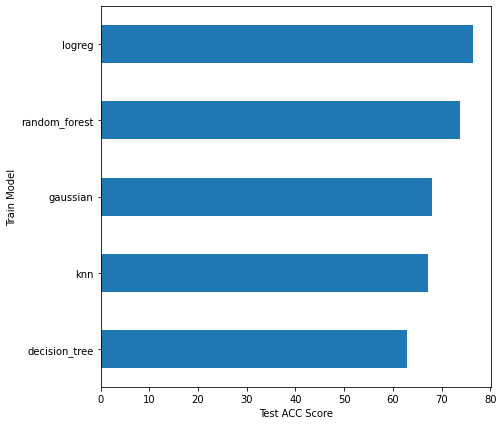

In [25]:
from pandas import Series
train_model=[]
train_model.append('logreg')
train_model.append('knn')
train_model.append('gaussian')
train_model.append('random_forest')
train_model.append('decision_tree')

test_score_list=[]
test_score_list.append(acc_log_test)
test_score_list.append(acc_knn_test)
test_score_list.append(acc_gaussian_test)
test_score_list.append(acc_random_forest_test)
test_score_list.append(acc_decision_tree_test)

Series_acc_imp = Series(test_score_list, train_model)

plt.figure(figsize=(7, 7))
Series_acc_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Test ACC Score')
plt.ylabel('Train Model')
plt.show()

> ### 모델 성능 평가

> ROC curve와 AUC를 통해 모델 성능 평가
* ROC(Receiver Operating Characteristic) : 모든 임계값에서 분류 모델의 성능을 보여주는 그래프
* AUC(Area Under the Curve) : ROC 곡선 아래 영역 


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44257 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0, flags=flags)


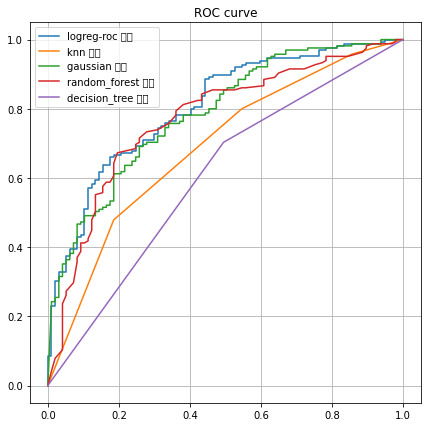

In [26]:
logreg_pos = logreg.predict_proba(X_test)[:,1]
knn_pos = knn.predict_proba(X_test)[:,1]
gaussian_pos = gaussian.predict_proba(X_test)[:,1]
random_forest_pos = random_forest.predict_proba(X_test)[:,1]
decision_tree_pos = decision_tree.predict_proba(X_test)[:,1]

from sklearn.metrics import roc_curve, roc_auc_score

fprs1, tprs1, thresholds1 = roc_curve(Y_test,logreg_pos)
fprs2, tprs2, thresholds2 = roc_curve(Y_test,knn_pos)
fprs3, tprs3, thresholds3 = roc_curve(Y_test,gaussian_pos)
fprs4, tprs4, thresholds4 = roc_curve(Y_test,random_forest_pos)
fprs5, tprs5, thresholds5 = roc_curve(Y_test,decision_tree_pos)
plt.figure(figsize=(7,7))
plt.plot(fprs1, tprs1, label='logreg-roc 곡선')
plt.plot(fprs2, tprs2, label='knn 곡선')
plt.plot(fprs3, tprs3, label='gaussian 곡선')
plt.plot(fprs4, tprs4, label='random_forest 곡선')
plt.plot(fprs5, tprs5, label='decision_tree 곡선')
plt.legend()
plt.grid(True)
plt.title('ROC curve')
plt.show()

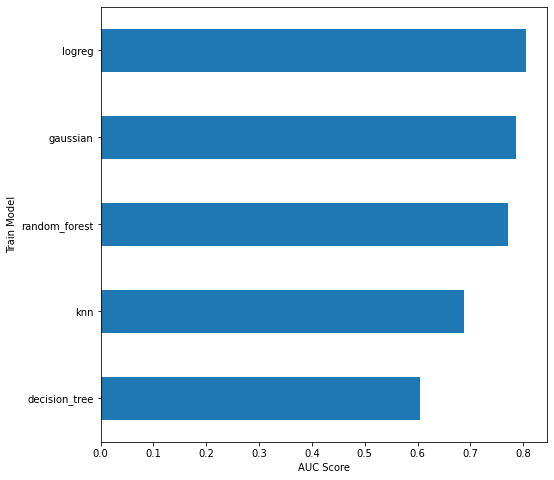

In [27]:
auc_list=[]
auc_list.append(roc_auc_score(Y_test,logreg_pos))
auc_list.append(roc_auc_score(Y_test,knn_pos))
auc_list.append(roc_auc_score(Y_test,gaussian_pos))
auc_list.append(roc_auc_score(Y_test,random_forest_pos))
auc_list.append(roc_auc_score(Y_test,decision_tree_pos))

Series_auc_imp = Series(auc_list, train_model)

plt.figure(figsize=(8, 8))
Series_auc_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('AUC Score')
plt.ylabel('Train Model')
plt.show()

In [28]:
roc_auc_score(Y_test,logreg_pos)

0.8046860356138706

위 acc점수와 ROC curve, AUC점수를 통해 Logistic Regression의 모델이 가장 뛰어나다는 것을 확인할 수 있다.

> ### Logistic Regression 모델 내 변수 중요도 평가

> 앞서 모델 비교를 통해 Logistic Regression 모델이 가장 뒤어남을 확인할 수 있었다. 따라서 모델에서 어떤 변수가 얼만큼 중요했는 지 확인하기 위해 모델 내 변수 중요도에 대한 그래프를 그려보았다.


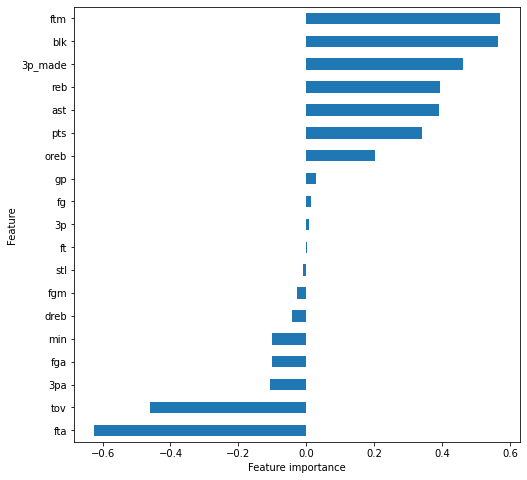

In [29]:
from pandas import Series

feature_importance = logreg.coef_
Series_feat_imp = Series(feature_importance[0], index=X_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()